In [1]:
# Monta o Google Drive para acessar os dados.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importando as bibliotecas necessárias para análise de dados.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [109]:
# Define o caminho para o arquivo CSV.
caminho = ("/content/drive/MyDrive/Curso - Introdução a Machine Learning/Módulo 2 - Métodos de Aprendizado de Máquina e suas Aplicações/California_housing_Dataset.csv")

# Carrega os dados do arquivo CSV em um DataFrame pandas.
df = pd.read_csv(caminho)

#Análise Exploratória de Dados

In [11]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
# Mostra a contagem de valores únicos na coluna 'total_bedrooms'.
df['total_bedrooms'].value_counts()

,count
total_bedrooms,
280.0,55
331.0,51
345.0,50
343.0,49
393.0,49
...,...
2009.0,1
2249.0,1
3114.0,1


In [110]:
# Remove as linhas com valores nulos.
df = df.dropna()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [54]:
df.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9034
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,NaN
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,NaN
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,NaN


In [55]:
# Mostra a contagem de valores únicos na coluna 'ocean_proximity'.
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9034
INLAND,6496
NEAR OCEAN,2628
NEAR BAY,2270
ISLAND,5


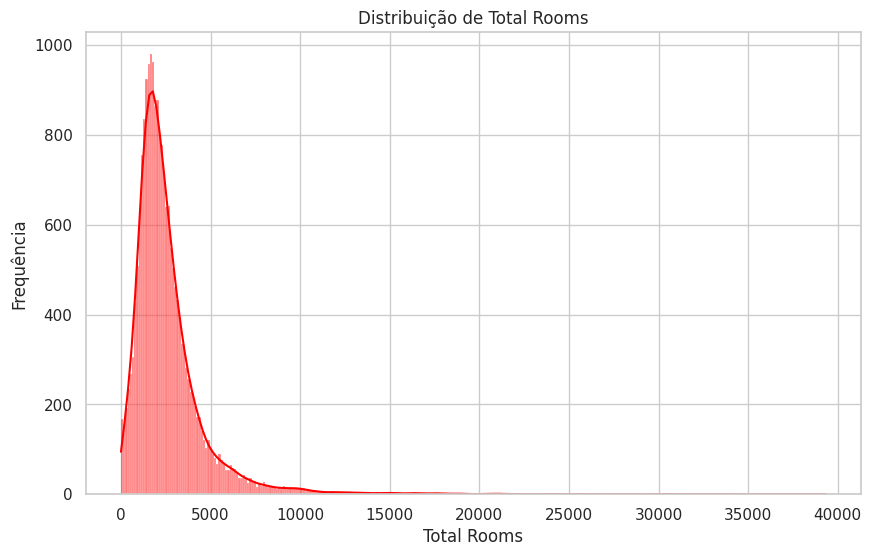

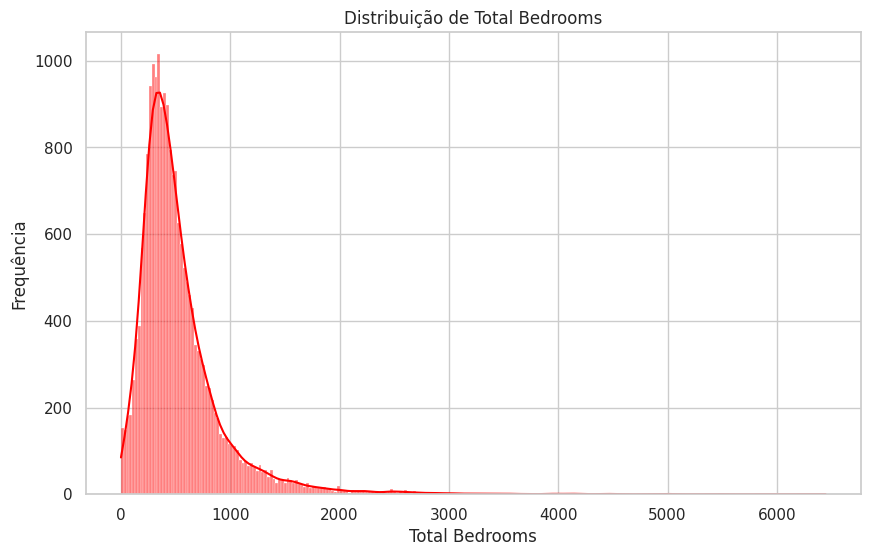

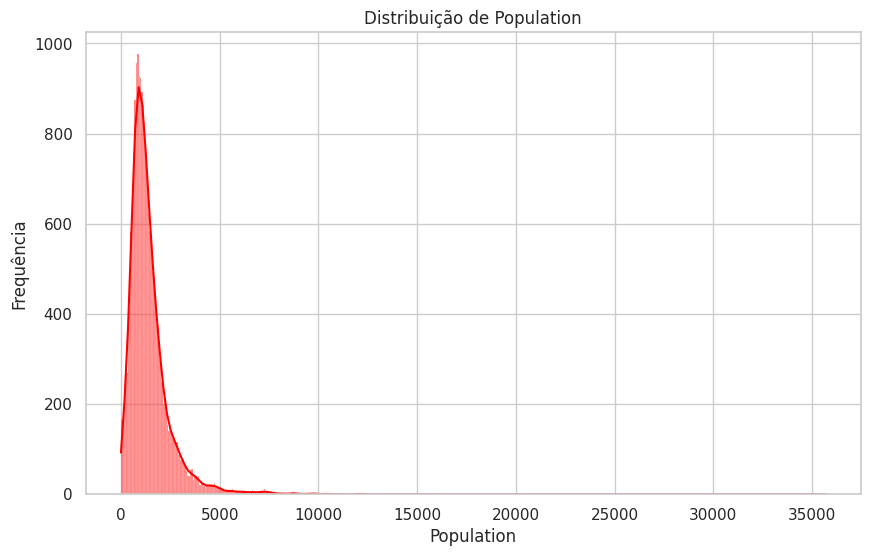

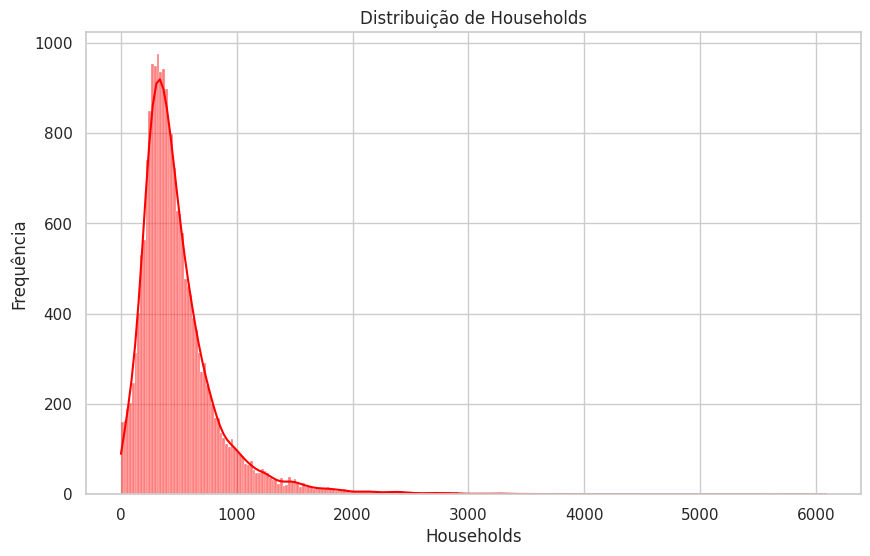

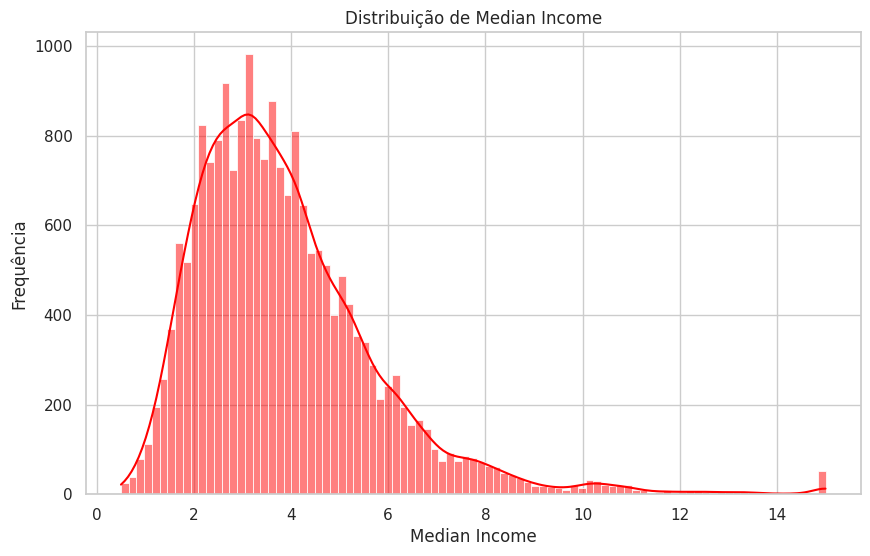

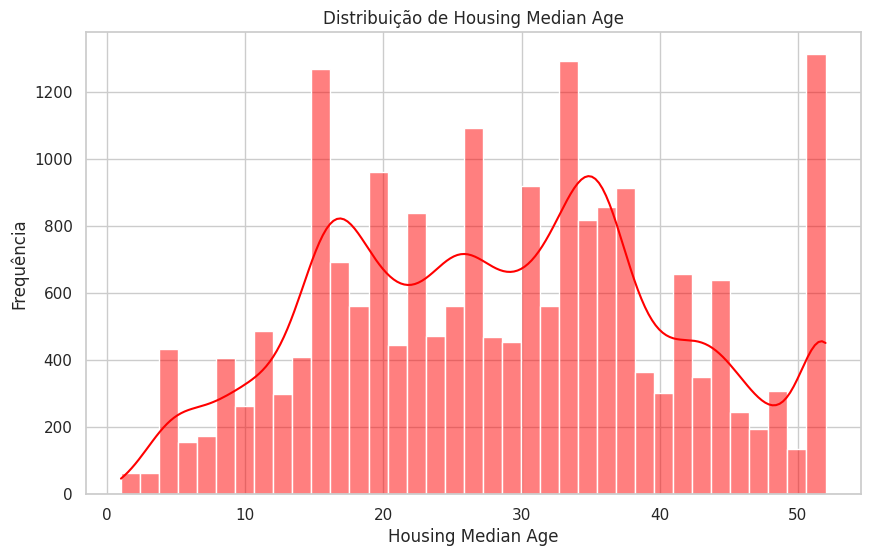

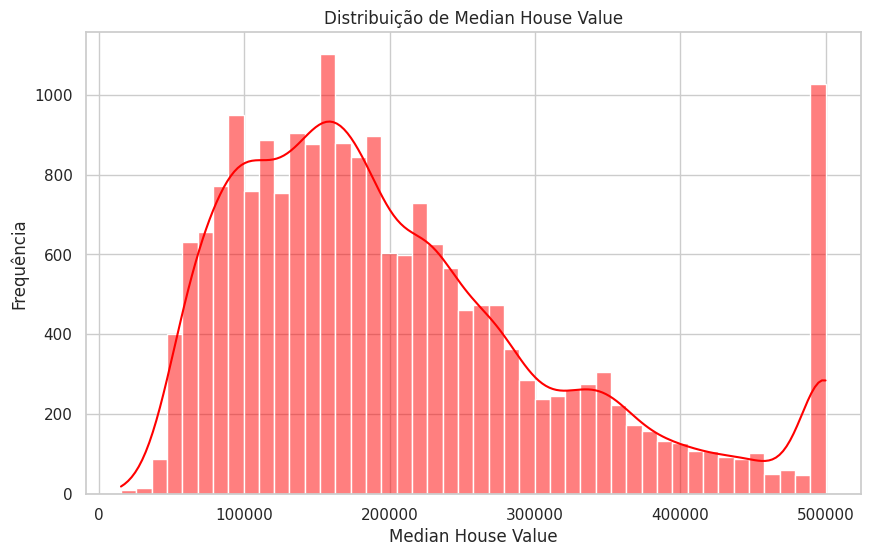

In [103]:
# Lista das colunas para os histogramas
columns_to_plot = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'housing_median_age', 'median_house_value']

# Configura o tema do Seaborn para todos os gráficos
sns.set_theme(style="whitegrid")

# Loop através das colunas
for column in columns_to_plot:
    # Cria uma nova figura para cada histograma
    plt.figure(figsize=(10, 6))

    # Cria o histograma usando sns.histplot
    sns.histplot(df[column], color='Red', kde=True)

    # Define o título e os rótulos dos eixos
    plt.title(f'Distribuição de {column.replace("_", " ").title()}')
    plt.xlabel(column.replace("_", " ").title())
    plt.ylabel('Frequência')

    # Exibe o gráfico
    plt.show()

#Pré-Processamento dos dados

In [111]:
# Codificação variável categórica
df = pd.get_dummies(df, columns=['ocean_proximity'])

In [112]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


In [113]:
# Criando mais colunas
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

In [114]:
display(df)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,False,True,False,False,False,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,False,True,False,False,False,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,False,True,False,False,False,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,False,True,False,False,False,5.329513,0.219892,2.123209


In [115]:
# Cria um objeto StandardScaler.
scaler = StandardScaler()

In [116]:
# Importa as bibliotecas para pré-processamento de dados.
from sklearn.preprocessing import StandardScaler

In [117]:
# Aplica o StandardScaler nas colunas selecionadas
for col in df.columns:
  if df[col].dtype == 'float64':
    df[col] = scaler.fit_transform(df[[col]])

In [118]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,2.128819,False,False,False,True,False,0.625395,-1.146024,-0.049433
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,1.313626,False,False,False,True,False,0.324942,-0.987254,-0.092134
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.258183,False,False,False,True,False,1.150594,-1.440514,-0.025797
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,1.164622,False,False,False,True,False,0.155467,-0.492925,-0.050162
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,1.172418,False,False,False,True,False,0.342549,-0.706141,-0.085272


#Processamento dos dados

In [119]:
# Importa as funções para dividir os dados e fazer validação cruzada.
from sklearn.model_selection import train_test_split, cross_val_score

In [120]:
# Define as variáveis independentes.
X = df.drop('median_house_value', axis=1)

# Define a variável dependente.
y = df['median_house_value']

In [121]:
# Codificando y
y = np.log1p(y)

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [122]:
# Remove as linhas onde y é NaN
df = df.dropna(subset=['median_house_value'])
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [123]:
# Divide os dados em conjuntos de treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [124]:
# Identificação de quais features influenciam a variável preditora
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

# Salvando Regressão Linear no objeto model.
model = LinearRegression()

# Istanciando o objeto rfecv.
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='neg_mean_squared_error')

# Fit no RFECV.
rfecv.fit(X_train, y_train)

# Pegue o nome das features selecionadas.
selected_features = X_train.columns[rfecv.support_]
print("Selected Features:", selected_features.tolist())

Selected Features: ['longitude', 'latitude', 'housing_median_age', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN', 'rooms_per_household', 'bedrooms_per_room']


In [125]:
# Exibe o formato dos conjuntos de treino e teste.
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13690, 16), (6743, 16), (13690,), (6743,))

In [80]:
# Importa a classe para regressão linear.
from sklearn.linear_model import LinearRegression

In [126]:
# Cria o modelo de regressão linear.
model = LinearRegression()

In [127]:
# Ajusta o modelo aos dados de treino.
model.fit(X_train, y_train)

LinearRegression()

In [128]:
# Faz as previsões com os dados de teste.
y_pred = model.predict(X_test)

In [129]:
# Importa as métricas para avaliação do modelo.
from sklearn.metrics import mean_squared_error, r2_score

In [130]:
mse = mean_squared_error(y_test, y_pred) # Calcula o erro quadrático médio.
r2 = r2_score(y_test, y_pred) # Calcula o R².

In [131]:
print("Mean Squared Error:", mse) # Imprime o erro quadrático médio.
print("R-squared:", r2) # Imprime o R².

Mean Squared Error: 0.3376565233055043
R-squared: 0.6606779991939393


In [132]:
rmse = np.sqrt(mse) # Calcula a raiz do erro quadrático médio.
print("Root Mean Squared Error:", rmse) # Imprime a raiz do erro quadrático médio.

Root Mean Squared Error: 0.5810822001279202


In [133]:
# Faz a validação cruzada e alcula a raiz do erro quadrático médio
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = (-scores) ** 0.5
print(rmse_scores.mean())

0.6296586497044206


#Ajuste de hiperparâmetros

In [134]:
# Importa a classe ElasticNet.
from sklearn.linear_model import ElasticNet

In [135]:
# Importa a classe GridSearchCV.
from sklearn.model_selection import GridSearchCV

In [136]:
# Criando o modelo ElasticNet
elastic_net = ElasticNet()

In [137]:
# Definindo a grade de valores para 'alpha' e 'l1_ratio'
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.7, 1.0]  # Proporção L1/L2
}

In [138]:
# Configurando o GridSearchCV
grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error')

In [139]:
# Ajustando o modelo aos dados
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 1.0]},
             scoring='neg_mean_squared_error')

In [140]:
# Melhor modelo do GridSearch
best_model = grid_search.best_estimator_

In [141]:
# Fazendo previsões no conjunto de teste
y_pred = best_model.predict(X_test)

In [142]:
# Calculando MSE, RMSE e R²
mse = mean_squared_error(y_test, y_pred)  # MSE
rmse = np.sqrt(mse)                      # RMSE
r2 = r2_score(y_test, y_pred)            # R²

In [143]:
# Resultados
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor MSE (negativo no GridSearch):", grid_search.best_score_)
print("MSE no conjunto de teste:", mse)
print("RMSE no conjunto de teste:", rmse)
print("R² no conjunto de teste:", r2)

Melhores parâmetros: {'alpha': 0.01, 'l1_ratio': 0.1}
Melhor MSE (negativo no GridSearch): -0.35521158065794983
MSE no conjunto de teste: 0.33983357816497595
RMSE no conjunto de teste: 0.5829524664713033
R² no conjunto de teste: 0.6584902060971298
